In [1]:
import sys
sys.path.insert(0, '../../python_dms/lib/')
from tools_dms import *
from dms import *
from PIL import Image
import scipy.io as sio
import matplotlib.pyplot as plt
import scipy.io
import time 
from sklearn.metrics import jaccard_score
%load_ext autoreload
%autoreload 2

In [2]:
import os
def prox_L1(x, tau):
    return x - np.maximum(np.minimum(x, tau), -tau)

def optD(self, x):
    if canal == 3:
        y = np.zeros((rows, cols, 2, canal))
        y[:, :, 0, :] = (np.concatenate((x[:, 1:, :] - x[:, 0:-1, :], np.zeros((rows, 1, canal))),axis=1,)/ 2.0 )
        y[:, :, 1, :] = (np.concatenate( (x[1:, :, :] - x[0:-1, :, :], np.zeros((1, cols, canal))),axis=0,)/ 2.0)
        return y
    elif canal == 1:
        y = np.zeros((rows, cols, 2))
        # # print(temp.shape)
        y[:, :, 0] = (np.concatenate((x[:, 1:] - x[:, 0:-1], np.zeros((rows, 1))), axis=1)/ 2.0)
        y[:, :, 1] = (np.concatenate((x[1:, :] - x[0:-1, :], np.zeros((1, cols))), axis=0 )/ 2.0)
        return y

def optDadjoint( x):
    if canal == 3:
        y1 = (np.concatenate((x[:, 0, 0, :].reshape(rows, 1, 3),x[:, 1:-1, 0, :] - x[:, 0:-2, 0, :],-x[:, -2, 0, :].reshape(rows, 1, 3),),axis=1,)/ 2) 
        y2 = (np.concatenate((x[0, :, 1, :].reshape(1, cols, 3),x[1:-1, :, 1, :] - x[:-2, :, 1, :],-x[-2, :, 1, :].reshape(1, cols, 3),),axis=0,)/ 2)
        y = -y1 - y2
        return y
    elif self.canal == 1:
        y1 = (np.concatenate((x[:, 0, 0].reshape(rows, 1), x[:, 1:-1, 0] - x[:, 0:-2, 0],-x[:, -2, 0].reshape(rows, 1),),axis=1,)/ 2.0)
        y2 = ( np.concatenate(( x[0, :, 1].reshape(1, cols),x[1:-1, :, 1] - x[:-2, :, 1],-x[-2, :, 1].reshape(1, cols),),axis=0,)/ 2.0)
        y = -y1 - y2
        return y
import os
def SegtoCon_DMS(seg):
    rows,cols = np.shape(seg)
    cont= np.zeros_like(seg)
    y=  np.zeros((rows,cols,2))
    y[:, :, 0] = np.concatenate((seg[:, 1:] - seg[:, 0:-1], np.zeros((rows, 1))),axis=1) / 2.
    y[:, :, 1] = np.concatenate((seg[1:, :] - seg[0:-1, :], np.zeros((1, cols))),axis=0) / 2.
    
    for i in range(rows):
        for j in range(cols):
            if np.abs(y[i,j,0]) > 0 or np.abs(y[i,j,1])>0:
                cont[i,j]=1
#                 im[i,j,:]=0
    return cont

def SegtoCon_DMS(seg):
    rows,cols = np.shape(seg)
    cont= np.zeros_like(seg)
    y=  np.zeros((rows,cols,2))
    y[:, :, 0] = np.concatenate((seg[:, 1:] - seg[:, 0:-1], np.zeros((rows, 1))),axis=1) / 2.
    y[:, :, 1] = np.concatenate((seg[1:, :] - seg[0:-1, :], np.zeros((1, cols))),axis=0) / 2.
    
    for i in range(rows):
        for j in range(cols):
            if np.abs(y[i,j,0]) > 0 or np.abs(y[i,j,1])>0:
                cont[i,j]=1
#                 im[i,j,:]=0
    return cont

In [3]:
listname = ['80090','157032','196027','106005','163004']

In [4]:
def calculate_psnr(img1, img2, max_value=1):
    """"Calculating peak signal-to-noise ratio (PSNR) between two images."""
    mse = np.mean((np.array(img1, dtype=np.float32) - np.array(img2, dtype=np.float32)) ** 2)
    if mse == 0:
        return 100
    return 20 * np.log10(max_value / (np.sqrt(mse)))

In [27]:
listx=[]
liste=[]

100%|█████████████████████████████████████████████████████████████| 175/175 [00:21<00:00,  8.15it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


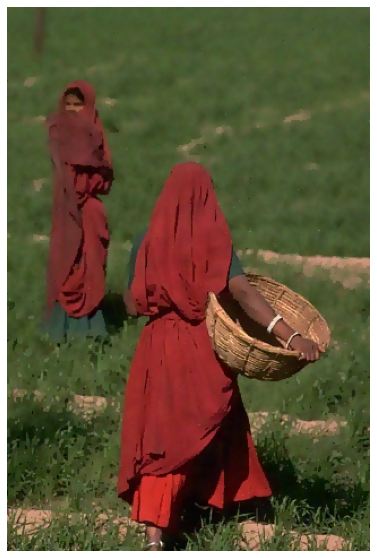

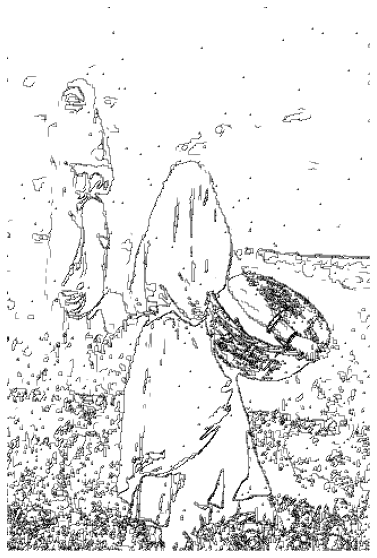

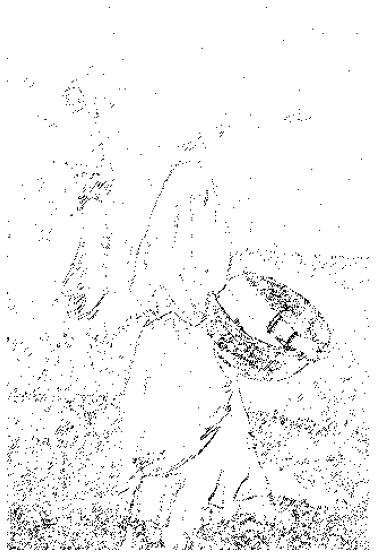

0.07954977471461173
31.173446484958035


100%|█████████████████████████████████████████████████████████████| 175/175 [00:21<00:00,  8.23it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


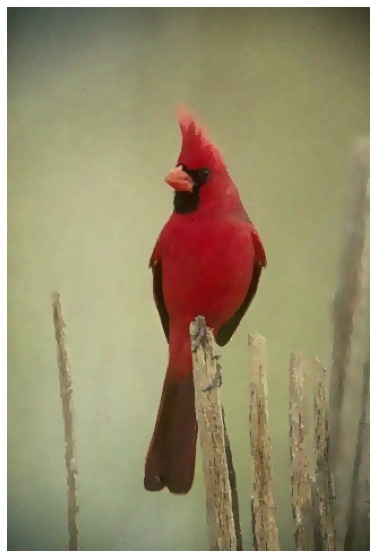

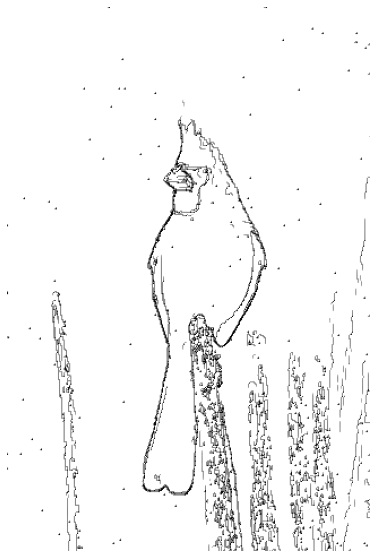

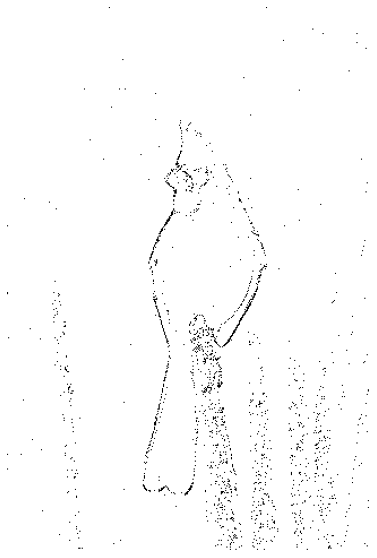

/home/hoangtrieuvy/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.05067581226507308
34.95821171412845


100%|█████████████████████████████████████████████████████████████| 175/175 [00:23<00:00,  7.43it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


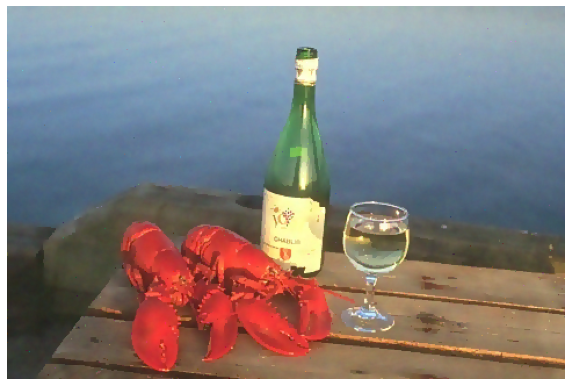

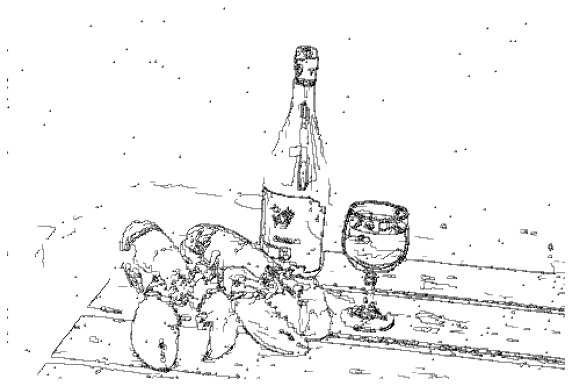

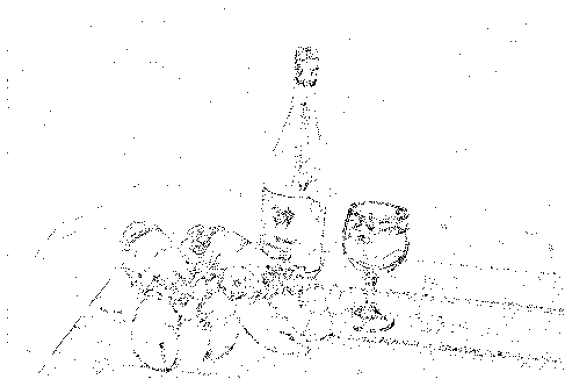

0.08182885246728218
33.666377512961134


100%|█████████████████████████████████████████████████████████████| 175/175 [00:31<00:00,  5.51it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


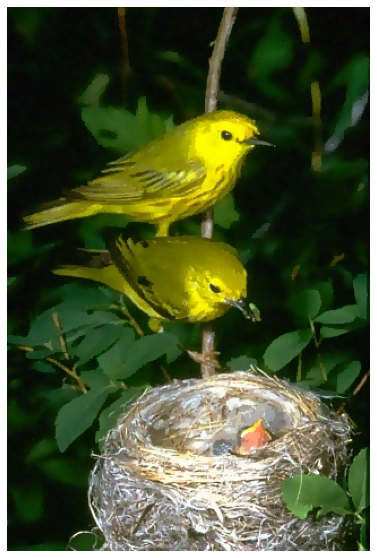

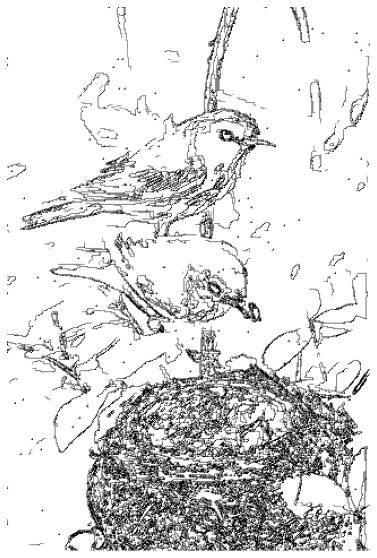

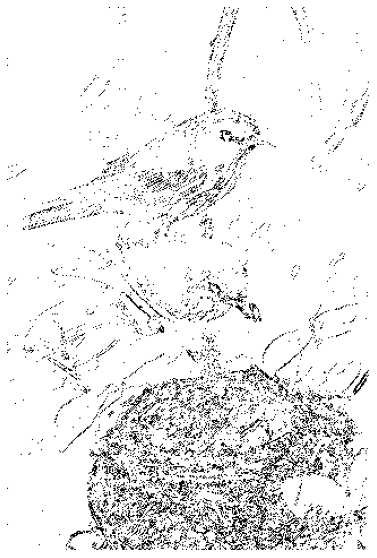

0.061303683797361425
31.11652073054744


100%|█████████████████████████████████████████████████████████████| 175/175 [00:29<00:00,  5.85it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


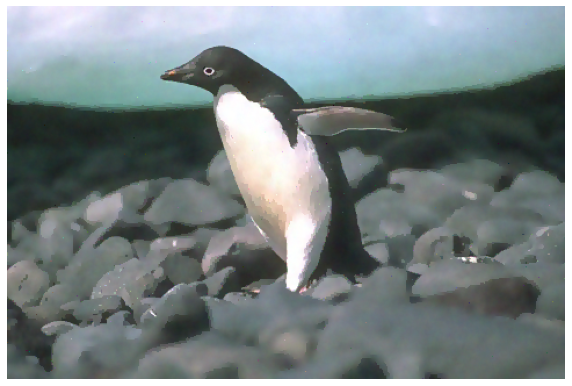

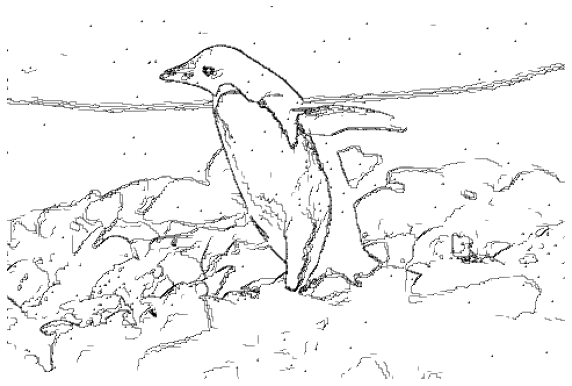

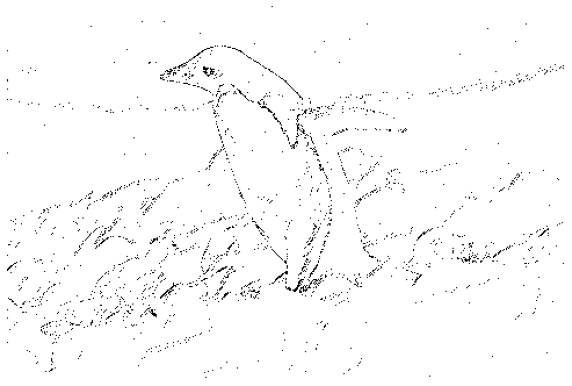

0.07005995660669237
34.14511069048912


In [28]:
valid_extensions = ['.jpg', '.jpeg', '.png', '.gif','.mat']  # Add more extensions if needed
np.random.seed(0)
# folder_path= "../../../BSDS500/data/images/train/"
folder_path= "../../../../../Documents/dataset/BSDS500/data/images/test/"

idim=0
for filename in os.listdir(folder_path):
    if os.path.splitext(filename)[1].lower() in valid_extensions:
        image_path = os.path.join(folder_path, filename)
        image_name= os.path.splitext(filename)[0]
        if image_name in listname:
            np.random.seed(0)
            x = np.array(Image.open(image_path))/255.
            rows,cols,_ = np.shape(x)
            mat_file_path = "../../../../../Documents/dataset/BSDS500/data/groundTruth/test/"+image_name+".mat"
            mat_file = scipy.io.loadmat(mat_file_path)
            cont= np.zeros((rows,cols))
            for v in range(0,5):
                seg = mat_file['groundTruth'][0,v][0,0][0]
                cont += SegtoCon_DMS(seg)
            cont = np.where(cont > 0, 1, 0)


            rows,cols,_ = np.shape(x)
            delta= 0.05
            z = x+ delta*np.random.normal(0,1,x.shape)
            slpam_l1_solver = DMS(norm_type="l1",
                                    edges="similar",
                                    beta=8,
                                    lamb=1e-2,
                                    stop_criterion=1e-4,
                                    MaximumIteration=175,
                                    method="SLPAM",
                                    noised_image_input=z,
                                    optD="OptD",
                                    dk_SLPAM_factor=1e-5,
                                    A=np.ones((rows,cols)))
            out_slpam_l1 = slpam_l1_solver.process()
            listx+= [out_slpam_l1[1]]
            liste+= [out_slpam_l1[0]]
            plt.figure(figsize=(10,10))
            plt.imshow(out_slpam_l1[1])
            plt.axis('off')
            plt.show()
            
            epred = (out_slpam_l1[0][:,:,0]+out_slpam_l1[0][:,:,1])/2
            ethres = (epred>0.2)*np.ones_like(epred)
            plt.figure(figsize=(10,10))
            plt.imshow(epred,cmap='gray_r')
            plt.axis('off')
            plt.show()
            plt.figure(figsize=(10,10))
            plt.imshow(ethres,cmap='gray_r')
            plt.axis('off')
            plt.show()
            print(jaccard_score(cont,ethres,average='macro'))
            print(calculate_psnr(x,out_slpam_l1[1]))
#         idim+=1 
#         if idim ==1:
#             break

In [40]:
def calculate_psnr(img1, img2, max_value=1):
    """"Calculating peak signal-to-noise ratio (PSNR) between two images."""
    mse = np.mean((np.array(img1, dtype=np.float32) - np.array(img2, dtype=np.float32)) ** 2)
    return 20 * np.log10(max_value / (np.sqrt(mse)))
def jaccard(im1, im2):
    """
    Computes the Jaccard metric, a measure of set similarity.
    Parameters
    ----------
    im1 : array-like, bool
        Any array of arbitrary size. If not boolean, will be converted.
    im2 : array-like, bool
        Any other array of identical size. If not boolean, will be converted.
    Returns
    -------
    jaccard : float
        Jaccard metric returned is a float on range [0,1].
        Maximum similarity = 1
        No similarity = 0

    Notes
    -----
    The order of inputs for `jaccard` is irrelevant. The result will be
    identical if `im1` and `im2` are switched.
    """
    im1 = np.asarray(im1).astype(np.bool)
    im2 = np.asarray(im2).astype(np.bool)

    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

    intersection = np.logical_and(im1, im2)

    union = np.logical_or(im1, im2)

    return intersection.sum() / float(union.sum())

/tmp/ipykernel_26468/3696704975.py:26: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im1 = np.asarray(im1).astype(np.bool)
/tmp/ipykernel_26468/3696704975.py:27: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im2 = np.asarray(im2).astype(np.bool)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

80090 31.173446484958035 0.14291146679572717


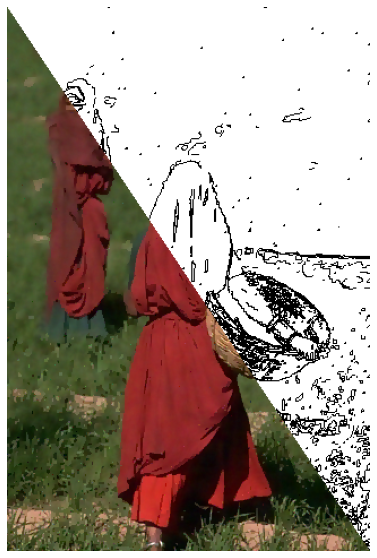

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


196027 34.95821171412845 0.18538430904022302


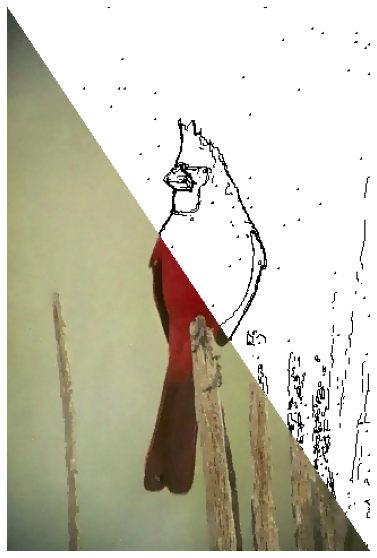

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


157032 33.666377512961134 0.23357664233576642


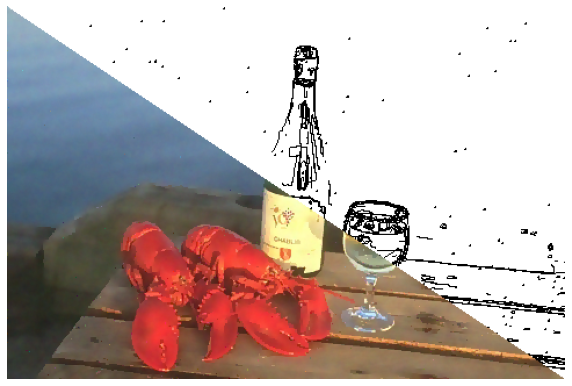

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


163004 31.11652073054744 0.11592019456341605


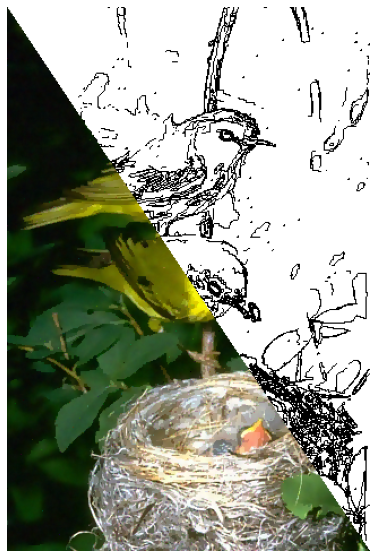

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


106005 34.14511069048912 0.17363112391930835


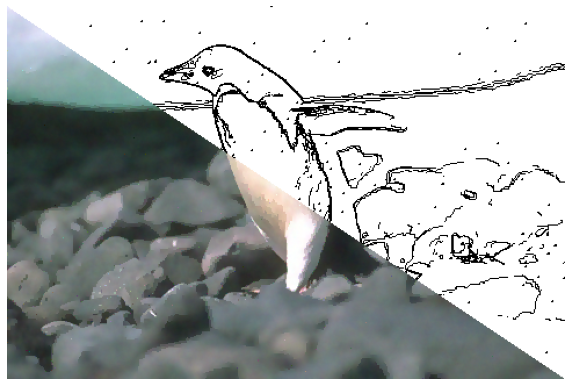

In [41]:
valid_extensions = ['.jpg', '.jpeg', '.png', '.gif','.mat']  # Add more extensions if needed
np.random.seed(0)
# folder_path= "../../../BSDS500/data/images/train/"
folder_path= "../../../../../Documents/dataset/BSDS500/data/images/test/"

idim=0
for filename in os.listdir(folder_path):
    if os.path.splitext(filename)[1].lower() in valid_extensions:
        image_path = os.path.join(folder_path, filename)
        image_name= os.path.splitext(filename)[0]
        if image_name in listname:
            np.random.seed(0)
            x = np.array(Image.open(image_path))/255.
            rows,cols,_ = np.shape(x)
            mat_file_path = "../../../../../Documents/dataset/BSDS500/data/groundTruth/test/"+image_name+".mat"
            mat_file = scipy.io.loadmat(mat_file_path)
            cont= np.zeros((rows,cols))
            for v in range(0,5):
                seg = mat_file['groundTruth'][0,v][0,0][0]
                cont += SegtoCon_DMS(seg)
            e_exact = np.where(cont > 0, 1, 0)

#             plt.figure(figsize=(10,10))
#             plt.imshow(cont,cmap='gray_r')
#             plt.show()
            epred = (liste[idim][:,:,0]+liste[idim][:,:,1])/2
            ethres = (epred>0.4)*np.ones_like(epred)
#             plt.figure(figsize=(10,10))
#             plt.imshow(ethres,cmap='gray_r')
#             plt.show()
#             print(jaccard_score(cont,ethres,average='macro'))
#             print(calculate_psnr(x,listx[idim]))
            thr=0.4
            e1 = 1-np.ones_like(epred)*(epred>thr)
            x1 = listx[idim]

            print(image_name,calculate_psnr(x,x1),jaccard(e_exact,np.ones_like(epred)*(epred>thr)))


            show=np.copy(x1)
            plt.figure(figsize=(10,10))
            for i in range(rows):
                # Loop through eac h column
                for j in range(cols):
                    # If the column index is greater than the row index, it's an element in the upper diagonal
                    if j > i*(cols/rows):
                        show[i,j,0]=e1[i,j]
                        show[i,j,1]=e1[i,j]
                        show[i,j,2]=e1[i,j]
            plt.imshow(show)
            plt.axis('off')
            plt.savefig('thres_TDScCP_SF_est_joint_'+str(image_name)+'.png', bbox_inches='tight', pad_inches=0)
            plt.show()
            idim+=1 
#         if idim ==1:
#             break